# 第2回
2020-09-15

## 本日の課題

➢ 決定木モデル作成とSubmit(前半)
1. 決定木モデルの理解
2. rpartによる決定木モデル作成(変数, パラメータを考えて決める)
3. Submit(投稿)

➢ Cross validationによるパラメータチューニング(後半)
1. Hold out法, Cross validation法の理解
2. Cross validation法によるパラメータチューニング
3. Submit(投稿)

# idea

- k分割をちゃんと均等にする
- ハイパーパラメータは層: np.arange(1, 13), 葉サイズ:np.arange(100, 1000+1, 100), 枝サイズ: 葉×np.arange(2, 10+1, 1) 全部振る
- 変数同士の積、商を変数にとる（量的同士、質的同士）（質的同士はAND, OR）
- ハイパラを全部振った上でのベストスコアで変数同士の積商を削っていく？
- yとの相関の大きさで削っていく？
- validのスコアが最大の点ならベストスコア？　過学習のペナルティはどう与える？　validscore×(validscore÷trainscore)？

- categ.は、まず2択のものだけ片方を落とす。そして各列のnotを導入
- 同じcateg.同士の積を取らないこと

## 参考にしたページ
[教師あり機械学習（分類・回帰） - Qiita](https://qiita.com/maskot1977/items/c648e398b3b86cb68ae5)  
[sklearn.tree.DecisionTreeClassifier — scikit-learn 0.23.2 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
[3.1. Cross-validation: evaluating estimator performance — scikit-learn 0.23.2 documentation](https://scikit-learn.org/stable/modules/cross_validation.html)  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pathlib import Path

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import plot_tree

In [2]:
raw_train = pd.read_csv('../input_data/bank/train.csv', sep=',', header=0, quotechar='\"')

In [107]:
def k_cross(train):
    K = 4
    np.random.seed(52149)
    train['cv_group'] = np.random.permutation(np.linspace(0, K, train.shape[0], endpoint=False).astype(int))

    train_score = []
    valid_score = []
    for i in range(K):
        train_tmp = train[train['cv_group'] != i].drop('cv_group', axis=1)
        valid_tmp = train[train['cv_group'] == i].drop('cv_group', axis=1)

        train_x = train_tmp.drop(columns=['y'])
        train_y = train_tmp[['y']]
    
        valid_x = valid_tmp.drop(columns=['y'])
        valid_y = valid_tmp[['y']]
    
        tree_model = DecisionTreeClassifier(
            criterion='entropy',
            splitter='best',
            random_state=52149,
            max_depth=7,
            min_samples_split=500,
            min_samples_leaf=200
        )
        tree_model = tree_model.fit(train_x, train_y)
    
        pred = tree_model.predict_proba(train_x)[:, 1]
        train_score.append(roc_auc_score(train_y, pred))
    
        pred = tree_model.predict_proba(valid_x)[:, 1]
        valid_score.append(roc_auc_score(valid_y, pred))

    return np.mean(train_score), np.mean(valid_score)

In [4]:
train = pd.get_dummies(raw_train, drop_first=False)
train['pdaysinv'] = (1 / train['pdays']).where(train['pdays'] >= 0, 0)
train = train.drop(columns=['id', 'day', 'pdays', 'contact_unknown'])
train_x = train.drop(columns=['y'])
train_y = train[['y']]

In [222]:
z = {'train': dict(), 'valid': dict()}
l = ['duration', 'pdaysinv', 'housing_yes', 'poutcome_success', 'campaign', 'loan_yes', 'contact_cellular']

for k in train_x.drop(columns=l):
    label = k
    print(label)
    x = train_x[[k]]
    auc = k_cross(pd.concat([x, train_x[l], train_y], axis=1))
    z['train'][k] = auc[0]
    z['valid'][k] = auc[1]

    for m in train_x.drop(columns=[*l, k]):
        label = '{}*{}'.format(k, m)
        print(label)
        x = pd.DataFrame(train_x[k] * train_x[m], columns=[label])
        auc = k_cross(pd.concat([x, train_x[l], train_y], axis=1))
        z['train'][label] = auc[0]
        z['valid'][label] = auc[1]

age
age*balance
age*previous
age*job_admin.
age*job_blue-collar
age*job_entrepreneur
age*job_housemaid
age*job_management
age*job_retired
age*job_self-employed
age*job_services
age*job_student
age*job_technician
age*job_unemployed
age*job_unknown
age*marital_divorced
age*marital_married
age*marital_single
age*education_primary
age*education_secondary
age*education_tertiary
age*education_unknown
age*default_no
age*default_yes
age*housing_no
age*loan_no
age*contact_cellular
age*contact_telephone
age*month_apr
age*month_aug
age*month_dec
age*month_feb
age*month_jan
age*month_jul
age*month_jun
age*month_mar
age*month_may
age*month_nov
age*month_oct
age*month_sep
age*poutcome_failure
age*poutcome_other
age*poutcome_unknown
balance
balance*age
balance*previous
balance*job_admin.
balance*job_blue-collar
balance*job_entrepreneur
balance*job_housemaid
balance*job_management
balance*job_retired
balance*job_self-employed
balance*job_services
balance*job_student
balance*job_technician
balance*job_

job_management*month_mar
job_management*month_may
job_management*month_nov
job_management*month_oct
job_management*month_sep
job_management*poutcome_failure
job_management*poutcome_other
job_management*poutcome_unknown
job_retired
job_retired*age
job_retired*balance
job_retired*previous
job_retired*job_admin.
job_retired*job_blue-collar
job_retired*job_entrepreneur
job_retired*job_housemaid
job_retired*job_management
job_retired*job_self-employed
job_retired*job_services
job_retired*job_student
job_retired*job_technician
job_retired*job_unemployed
job_retired*job_unknown
job_retired*marital_divorced
job_retired*marital_married
job_retired*marital_single
job_retired*education_primary
job_retired*education_secondary
job_retired*education_tertiary
job_retired*education_unknown
job_retired*default_no
job_retired*default_yes
job_retired*housing_no
job_retired*loan_no
job_retired*contact_cellular
job_retired*contact_telephone
job_retired*month_apr
job_retired*month_aug
job_retired*month_dec


marital_divorced
marital_divorced*age
marital_divorced*balance
marital_divorced*previous
marital_divorced*job_admin.
marital_divorced*job_blue-collar
marital_divorced*job_entrepreneur
marital_divorced*job_housemaid
marital_divorced*job_management
marital_divorced*job_retired
marital_divorced*job_self-employed
marital_divorced*job_services
marital_divorced*job_student
marital_divorced*job_technician
marital_divorced*job_unemployed
marital_divorced*job_unknown
marital_divorced*marital_married
marital_divorced*marital_single
marital_divorced*education_primary
marital_divorced*education_secondary
marital_divorced*education_tertiary
marital_divorced*education_unknown
marital_divorced*default_no
marital_divorced*default_yes
marital_divorced*housing_no
marital_divorced*loan_no
marital_divorced*contact_cellular
marital_divorced*contact_telephone
marital_divorced*month_apr
marital_divorced*month_aug
marital_divorced*month_dec
marital_divorced*month_feb
marital_divorced*month_jan
marital_divorce

education_unknown*job_unknown
education_unknown*marital_divorced
education_unknown*marital_married
education_unknown*marital_single
education_unknown*education_primary
education_unknown*education_secondary
education_unknown*education_tertiary
education_unknown*default_no
education_unknown*default_yes
education_unknown*housing_no
education_unknown*loan_no
education_unknown*contact_cellular
education_unknown*contact_telephone
education_unknown*month_apr
education_unknown*month_aug
education_unknown*month_dec
education_unknown*month_feb
education_unknown*month_jan
education_unknown*month_jul
education_unknown*month_jun
education_unknown*month_mar
education_unknown*month_may
education_unknown*month_nov
education_unknown*month_oct
education_unknown*month_sep
education_unknown*poutcome_failure
education_unknown*poutcome_other
education_unknown*poutcome_unknown
default_no
default_no*age
default_no*balance
default_no*previous
default_no*job_admin.
default_no*job_blue-collar
default_no*job_entr

month_apr*month_jan
month_apr*month_jul
month_apr*month_jun
month_apr*month_mar
month_apr*month_may
month_apr*month_nov
month_apr*month_oct
month_apr*month_sep
month_apr*poutcome_failure
month_apr*poutcome_other
month_apr*poutcome_unknown
month_aug
month_aug*age
month_aug*balance
month_aug*previous
month_aug*job_admin.
month_aug*job_blue-collar
month_aug*job_entrepreneur
month_aug*job_housemaid
month_aug*job_management
month_aug*job_retired
month_aug*job_self-employed
month_aug*job_services
month_aug*job_student
month_aug*job_technician
month_aug*job_unemployed
month_aug*job_unknown
month_aug*marital_divorced
month_aug*marital_married
month_aug*marital_single
month_aug*education_primary
month_aug*education_secondary
month_aug*education_tertiary
month_aug*education_unknown
month_aug*default_no
month_aug*default_yes
month_aug*housing_no
month_aug*loan_no
month_aug*contact_cellular
month_aug*contact_telephone
month_aug*month_apr
month_aug*month_dec
month_aug*month_feb
month_aug*month_jan


month_nov*job_housemaid
month_nov*job_management
month_nov*job_retired
month_nov*job_self-employed
month_nov*job_services
month_nov*job_student
month_nov*job_technician
month_nov*job_unemployed
month_nov*job_unknown
month_nov*marital_divorced
month_nov*marital_married
month_nov*marital_single
month_nov*education_primary
month_nov*education_secondary
month_nov*education_tertiary
month_nov*education_unknown
month_nov*default_no
month_nov*default_yes
month_nov*housing_no
month_nov*loan_no
month_nov*contact_cellular
month_nov*contact_telephone
month_nov*month_apr
month_nov*month_aug
month_nov*month_dec
month_nov*month_feb
month_nov*month_jan
month_nov*month_jul
month_nov*month_jun
month_nov*month_mar
month_nov*month_may
month_nov*month_oct
month_nov*month_sep
month_nov*poutcome_failure
month_nov*poutcome_other
month_nov*poutcome_unknown
month_oct
month_oct*age
month_oct*balance
month_oct*previous
month_oct*job_admin.
month_oct*job_blue-collar
month_oct*job_entrepreneur
month_oct*job_housem

In [223]:
pd.DataFrame(z).sort_values('valid', ascending=False).head(50)

,train,valid
contact_cellular*loan_no,0.888348,0.880811
loan_no*contact_cellular,0.888348,0.880811
age*poutcome_unknown,0.887915,0.880046
poutcome_unknown*age,0.887915,0.880046
balance*loan_no,0.887061,0.879263
loan_no*balance,0.887061,0.879263
contact_cellular,0.886394,0.879243
default_no*contact_cellular,0.886395,0.879218
contact_cellular*default_no,0.886395,0.879218
age*contact_cellular,0.886415,0.878783


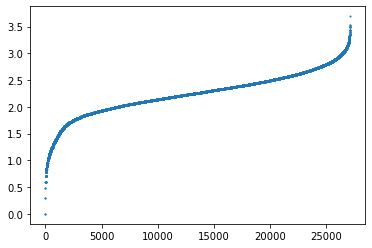

In [31]:
d = raw_train.sort_values(by='duration').reset_index()
d['logduration'] = np.log10(d.duration.where(d.duration > 0, 1))
plt.scatter(d.index, d.logduration, s=1)

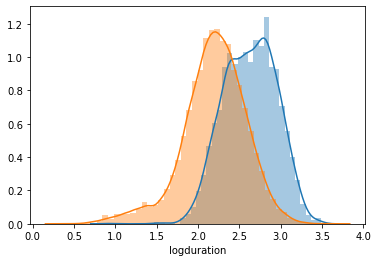

In [182]:
sns.distplot(d.logduration[d.y==1])
sns.distplot(d.logduration[d.y==0])

In [73]:
train

,age,balance,duration,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_success,pdaysinv
0,39,1756,939,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
1,51,1443,172,10,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.000000
2,36,436,567,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.001681
3,63,474,423,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.000000
4,31,354,502,1,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,42,1455,279,2,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.003717
27124,34,719,362,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.000000
27125,36,49,405,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.000000
27126,33,209,76,4,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.000000


In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
def calc(model, train_x, train_y):
    cv = StratifiedKFold(n_splits=3)
    cv_results = cross_validate(model, train_x, train_y, cv=cv, scoring='roc_auc', return_train_score=True, return_estimator=True)
    return cv_results  # cv_results['test_score'].mean(), cv_results['train_score'].mean()

In [177]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

train = pd.get_dummies(raw_train, drop_first=False)
train['pdaysinv'] = (1 / train['pdays']).where(train['pdays'] >= 0, 0)
train['logduration'] = np.log10(train['duration'].where(train['duration'] > 0, 1))
train['poutcomeXhousing'] = train['poutcome_success'] * train['housing_yes']
train['campaignXlogduration'] = train['campaign'] * train['logduration']
train = train.drop(columns=['id', 'day', 'pdays', 'duration', #'marital_divorced', 'month_dec',
                            *train.columns[train.columns.str.startswith('month_')],
                            *train.columns[train.columns.str.endswith('_unknown')],
                            #*train.columns[train.columns.str.endswith('_no')],
                            *train.columns[train.columns.str.endswith('_other')]])

tree_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    class_weight='balanced',
    random_state=52149,
    max_depth=10,
    min_samples_leaf=30,
    min_samples_split=300)

calc(tree_model, train.drop(columns=['y']), train[['y']])

{'fit_time': array([0.16356778, 0.19048405, 0.19048786]),
 'score_time': array([0.01495552, 0.02393842, 0.01595807]),
 'estimator': (DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                         max_depth=10, min_samples_leaf=30, min_samples_split=300,
                         random_state=52149),
  DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                         max_depth=10, min_samples_leaf=30, min_samples_split=300,
                         random_state=52149),
  DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                         max_depth=10, min_samples_leaf=30, min_samples_split=300,
                         random_state=52149)),
 'test_score': array([0.88766129, 0.87976292, 0.89366481]),
 'train_score': array([0.90951407, 0.9094172 , 0.90660473])}

In [100]:
%%time
# ベストなパラメーターを探し当てるためのグリッドサーチ
from sklearn.model_selection import GridSearchCV

# グリッドサーチを行うためのパラメーター（LogisticRegressionのパラメーター）
parameters = [
    {'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12], 'min_samples_leaf': [3, 10, 30, 100], 'min_samples_split':[200, 300, 400, 500]},
]

#グリッドサーチ実行
tree_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    class_weight='balanced',
    random_state=52149)
cv = StratifiedKFold(n_splits=3)
classifier = GridSearchCV(tree_model, parameters, cv=cv, scoring='roc_auc', return_train_score=True)
train_x = train.drop(columns=['y'])
train_y = train[['y']]
classifier.fit(train_x, train_y)
#print("Accuracy score (train): ", classifier.score(X_train, y_train))
#print("Accuracy score (test): ", classifier.score(X_test, y_test))
print(classifier.best_estimator_) # ベストのパラメーターを持つ分類器


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=11, min_samples_leaf=30, min_samples_split=500,
                       random_state=52149)
Wall time: 2min 1s


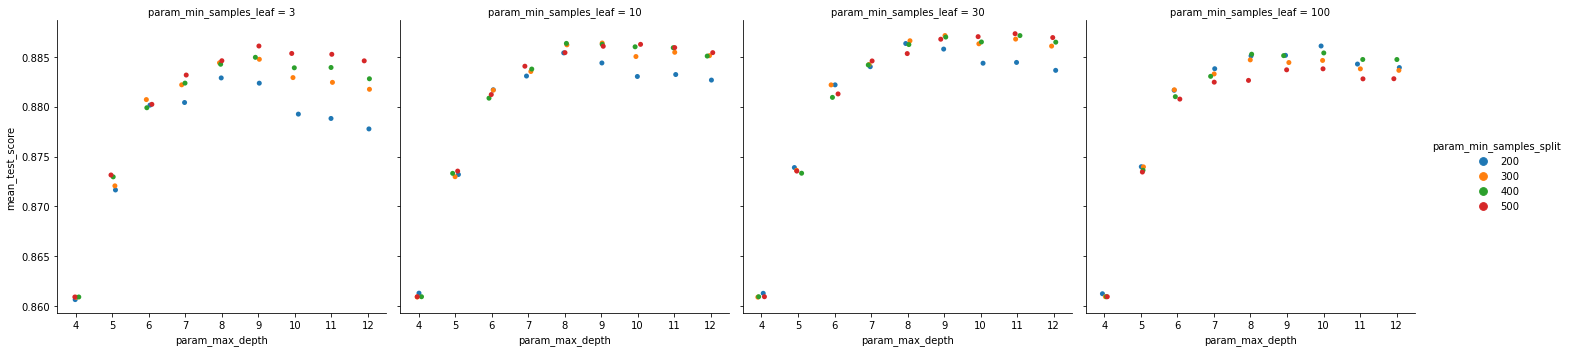

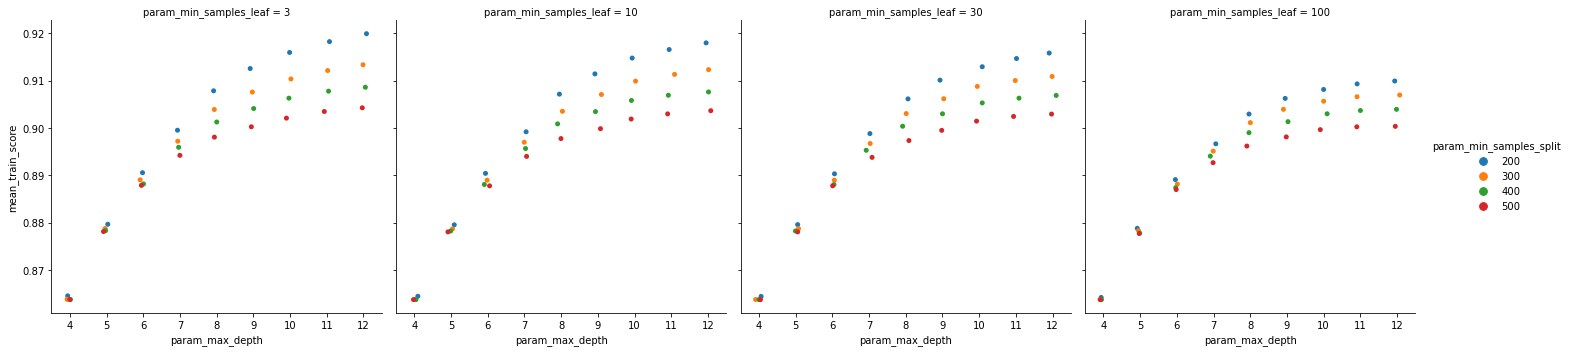

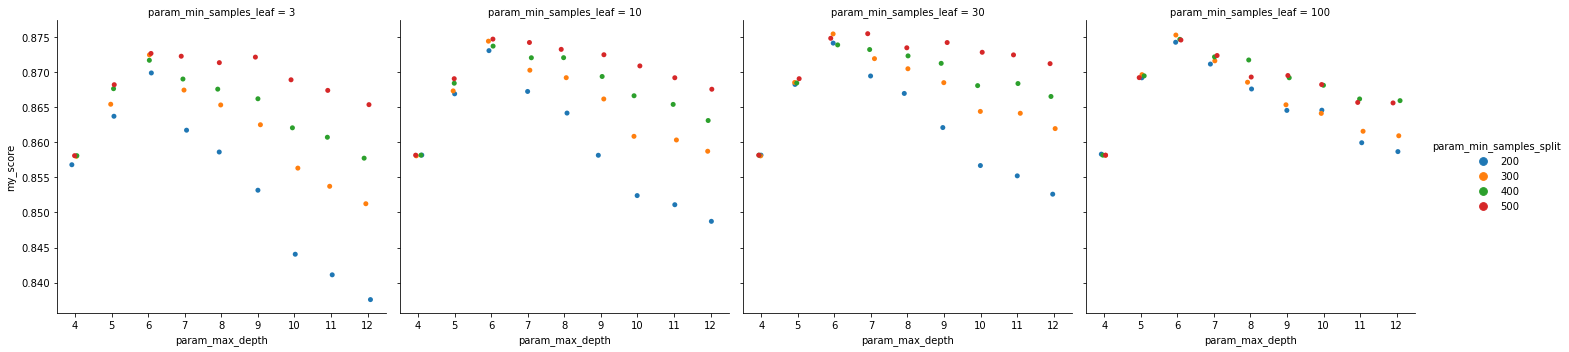

In [101]:
d = pd.DataFrame(classifier.cv_results_)
d['my_score'] = d.mean_test_score**2 / d.mean_train_score
sns.catplot(data=d, y='mean_test_score', x='param_max_depth', col='param_min_samples_leaf', hue='param_min_samples_split')
sns.catplot(data=d, y='mean_train_score', x='param_max_depth', col='param_min_samples_leaf', hue='param_min_samples_split')
sns.catplot(data=d, y='my_score', x='param_max_depth', col='param_min_samples_leaf', hue='param_min_samples_split')

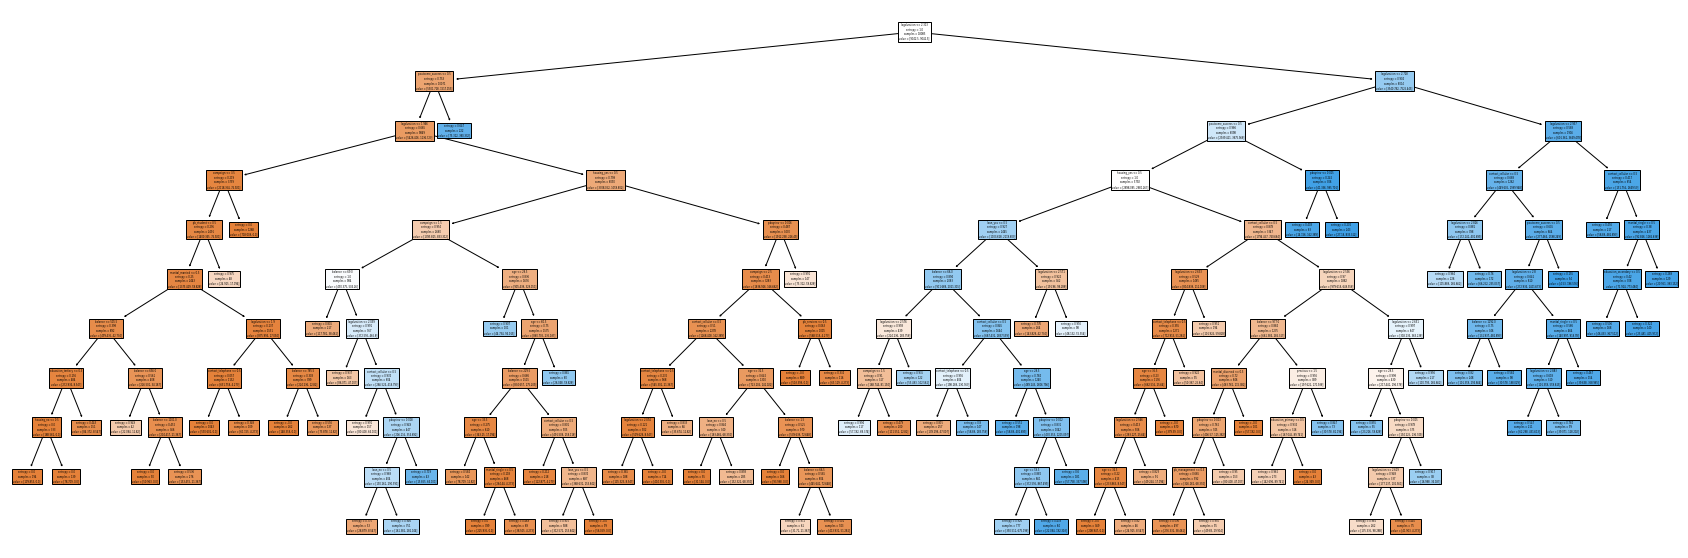

In [153]:
# scikit-learn 0.21以降から実装された
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot()
t = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    class_weight='balanced',
    random_state=52149,
    max_depth=10,
    min_samples_leaf=30,
    min_samples_split=300)
train_x = train.drop(columns=['y'])
train_y = train[['y']]
cvr = calc(t, train_x, train_y)
split_info = plot_tree(cvr['estimator'][0], feature_names=train_x.columns, ax=ax, filled=True)
est = cvr['estimator'][0]

In [174]:
d = pd.concat([train, pd.Series(est.predict(train_x)).rename('y_pred')], axis=1)

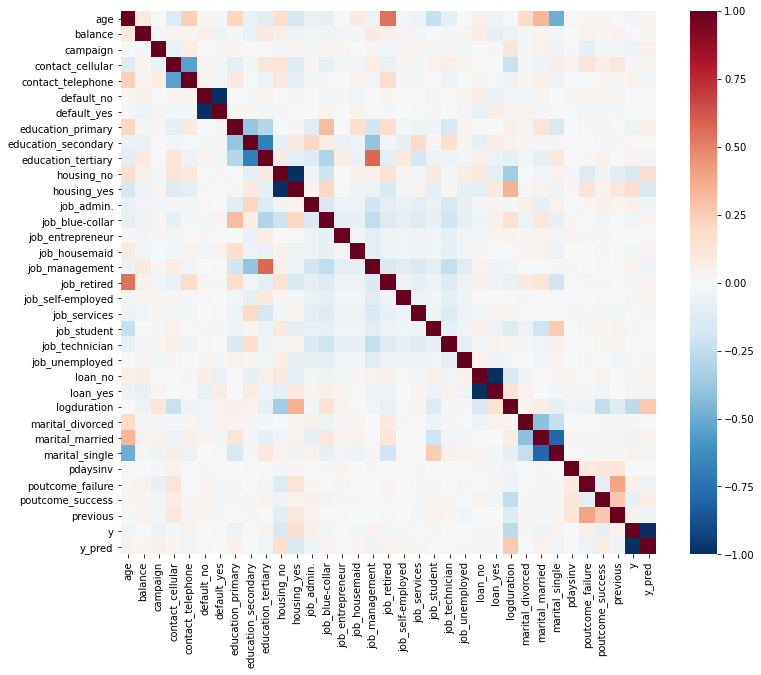

In [175]:
plt.figure(figsize=(12,10))
sns.heatmap(d.where(d.y - d.y_pred != 0).dropna().corr().sort_index(axis=0).sort_index(axis=1), vmin=-1, vmax=1, cmap='RdBu_r')

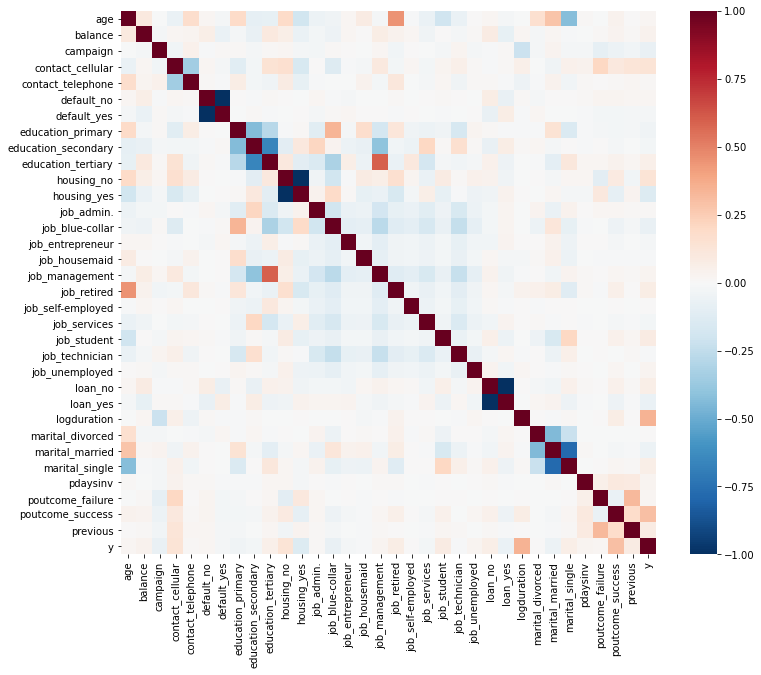

In [118]:
#d = train.corr().sort_values(by='y', axis=0, ascending=False).sort_values(by='y', axis=1, ascending=False)
d = train.corr().sort_index(axis=0).sort_index(axis=1)
plt.figure(figsize=(12,10))
sns.heatmap(d, vmin=-1, vmax=1, cmap='RdBu_r')

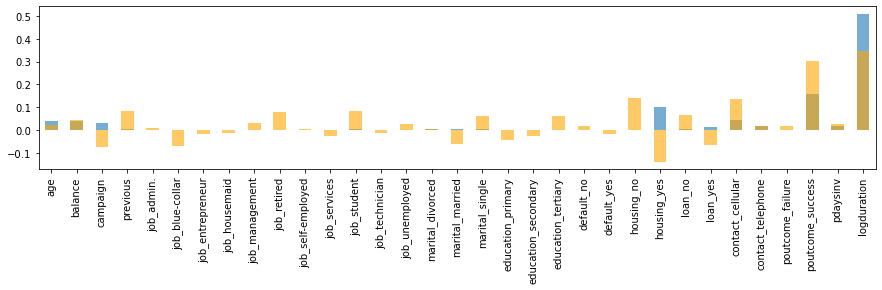

In [151]:
fti = pd.Series(cvr['estimator'][0].feature_importances_, index=train_x.columns)
#for i, feat in enumerate(train_x.columns):
#    print('\t{0:20s} : {1:>.6f}'.format(feat, fti[i]))
fti.plot.bar(alpha=0.6, figsize=(15,3))#; plt.show()
train.corr().y.drop('y').plot.bar(alpha=0.6, figsize=(15,3), color='orange')

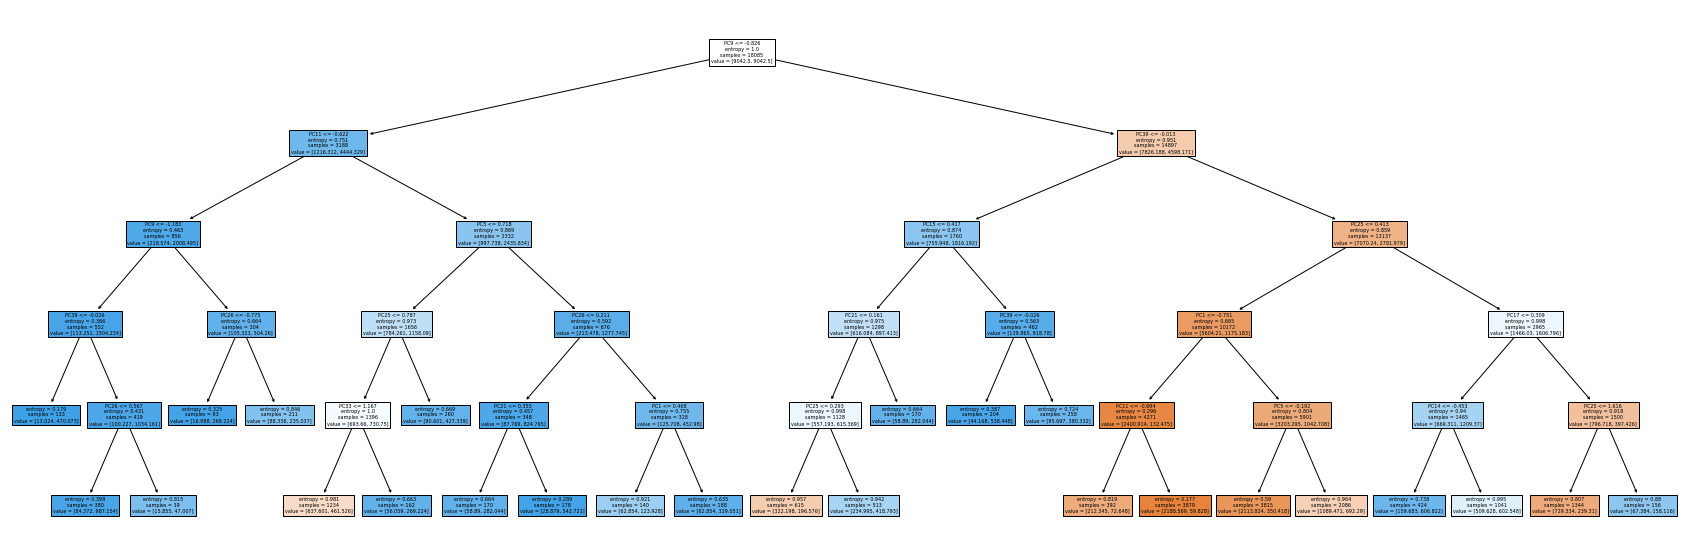

In [26]:
# scikit-learn 0.21以降から実装された
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot()
t = DecisionTreeClassifier(
    criterion='entropy',
    splitter='best',
    class_weight='balanced',
    random_state=52149,
    max_depth=5,
    min_samples_leaf=10,
    min_samples_split=300)
train_x = train.drop(columns=['y'])
train_y = train[['y']]
cvr = calc(t, feature, train_y)
split_info = plot_tree(cvr['estimator'][0], feature_names=feature.columns, ax=ax, filled=True)

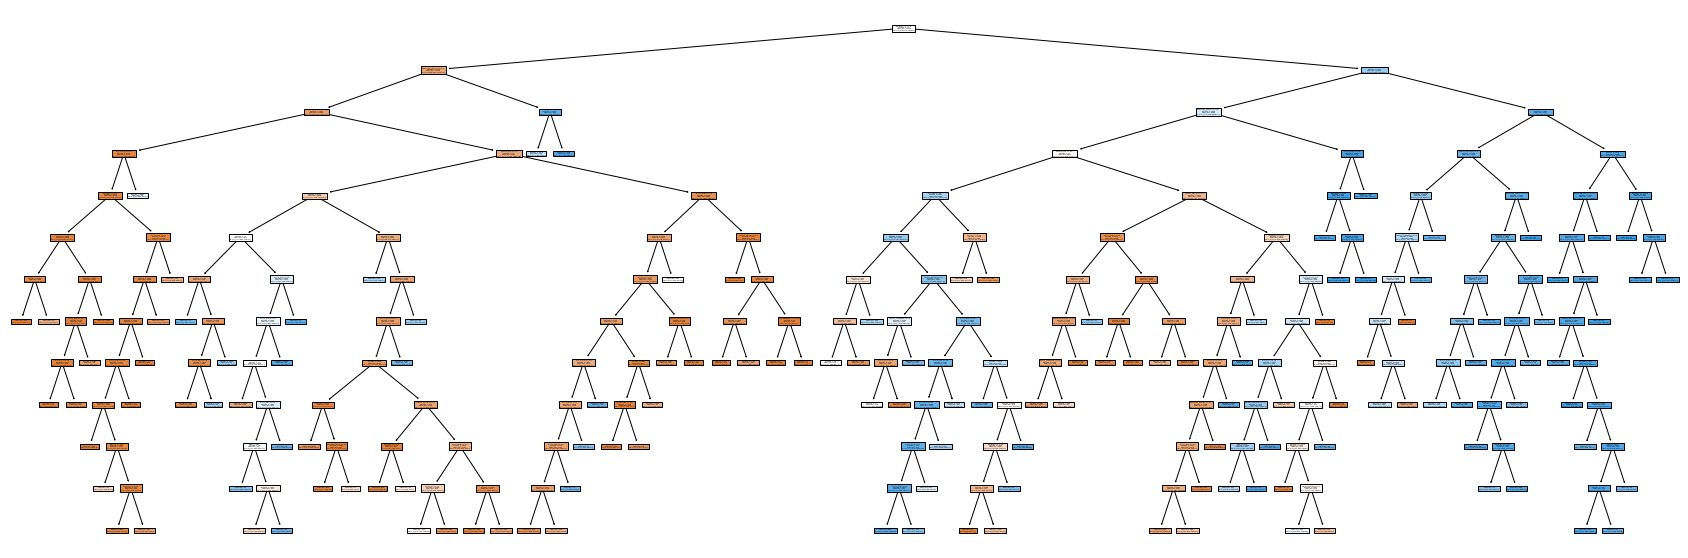

In [13]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot()
split_info = plot_tree(classifier.best_estimator_, feature_names=train_x.columns, ax=ax, filled=True)

In [12]:
pd.DataFrame(classifier.cv_results_).drop(columns='param_max_depth').groupby(by=['param_min_samples_leaf', 'param_min_samples_split']).max()[['mean_test_score', 'mean_train_score']]

mean_test_score  \
param_min_samples_leaf param_min_samples_split                    
3                      200                             0.891995   
                       300                             0.894433   
                       400                             0.894153   
                       500                             0.892464   
10                     200                             0.892965   
                       300                             0.894649   
                       400                             0.894096   
                       500                             0.892759   
30                     200                             0.892431   
                       300                             0.893164   
                       400                             0.892977   
                       500                             0.891224   
100                    200                             0.891668   
                       300                             0.890360   
                       400                             0.890367   
                       500                             0.887198   

                                                mean_train_score  
param_min_samples_leaf param_min_samples_split                    
3                      200                              0.926827  
                       300                              0.920058  
                       400                              0.914920  
                       500                              0.910700  
10                     200                              0.924328  
                       300                              0.918279  
                       400                              0.913957  
                       500                              0.909955  
30                     200                              0.921133  
                       300                              0.915302  
                       400                              0.911513  
                       500                              0.907338  
100                    200                              0.914144  
                       300                              0.910550  
                       400                              0.907351  
                       500                              0.902839

In [102]:
pd.DataFrame(classifier.cv_results_).groupby(by=['param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split']).max()[['mean_test_score', 'mean_train_score']]

mean_test_score  \
param_max_depth param_min_samples_leaf param_min_samples_split                    
3               100                    200                             0.825105   
                                       500                             0.823651   
                                       700                             0.823651   
                300                    200                             0.823387   
                                       500                             0.823387   
                                       700                             0.823387   
                500                    200                             0.821125   
                                       500                             0.821125   
                                       700                             0.821125   
4               100                    200                             0.859225   
                                       500                             0.857685   
                                       700                             0.857596   
                300                    200                             0.857733   
                                       500                             0.857733   
                                       700                             0.857600   
                500                    200                             0.846960   
                                       500                             0.846960   
                                       700                             0.846960   
5               100                    200                             0.868774   
                                       500                             0.866578   
                                       700                             0.865905   
                300                    200                             0.867535   
                                       500                             0.867535   
                                       700                             0.867818   
                500                    200                             0.858258   
                                       500                             0.858258   
                                       700                             0.858258   
6               100                    200                             0.876178   
                                       500                             0.873795   
                                       700                             0.873106   
                300                    200                             0.874425   
                                       500                             0.874425   
                                       700                             0.874006   
                500                    200                             0.863306   
                                       500                             0.863306   
                                       700                             0.863306   
7               100                    200                             0.881916   
                                       500                             0.879841   
                                       700                             0.879613   
                300                    200                             0.879180   
                                       500                             0.879180   
                                       700                             0.878680   
                500                    200                             0.866370   
                                       500                             0.866370   
                                       700                             0.866370   

                                                                mean_train_score  
param_max_depth param_min_samples_leaf param_min_samples_split                 

In [103]:
train = pd.read_csv('../input_data/bank/train.csv', sep=',', header=0, quotechar='\"')
train = train.drop(columns=['id'])
train = pd.get_dummies(train, drop_first=True)



K = 4
np.random.seed(52149)
train['cv_group'] = np.random.permutation(np.linspace(0, K, train.shape[0], endpoint=False).astype(int))

train_score = []
valid_score = []
for i in range(K):
    train_tmp = train[train['cv_group'] != i].drop('cv_group', axis=1)
    valid_tmp = train[train['cv_group'] == i].drop('cv_group', axis=1)

    train_x = train_tmp.drop(columns=['y'])
    train_y = train_tmp[['y']]
    
    valid_x = valid_tmp.drop(columns=['y'])
    valid_y = valid_tmp[['y']]
    
    tree_model = DecisionTreeClassifier(
        criterion='entropy',
        splitter='best',
        random_state=52149,
        max_depth=7,
        min_samples_split=500,
        min_samples_leaf=200
    )
    tree_model = tree_model.fit(train_x, train_y)
    
    pred = tree_model.predict_proba(train_x)[:, 1]
    train_score.append(roc_auc_score(train_y, pred))
    
    pred = tree_model.predict_proba(valid_x)[:, 1]
    valid_score.append(roc_auc_score(valid_y, pred))

train_auc, valid_auc = np.mean(train_score), np.mean(valid_score)

In [104]:
train_auc, valid_auc

(0.8946470029195438, 0.8870729041323415)

In [105]:
train_x

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
1,51,1443,18,172,10,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,63,474,25,423,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,31,354,30,502,1,9,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,37,52,6,908,1,185,9,0,0,0,...,0,0,0,0,0,0,1,0,1,0
7,32,230,18,442,1,266,8,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27122,59,2979,21,118,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
27123,42,1455,2,279,2,269,2,1,0,0,...,0,0,0,0,0,0,0,1,0,0
27124,34,719,15,362,3,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
27126,33,209,12,76,4,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [75]:
d = raw_train.copy()
d['mi'] = d.month.apply(lambda s: pd.Timestamp('2020-'+s).month)
d = pd.DataFrame([d.groupby('mi').sum().y.rename('y1'), d.groupby('mi').count().y.rename('yall')]).T
d

,y1,yall
mi,,
1,84,846
2,258,1586
3,152,299
4,337,1755
5,566,8317
6,324,3204
7,376,4136
8,425,3718
9,161,356


<BarContainer object of 12 artists>

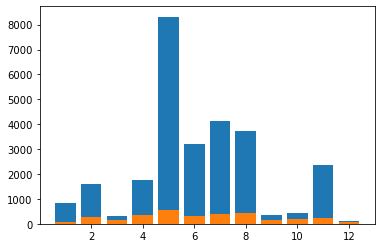

In [82]:
plt.bar(d.index, d.yall)
plt.bar(d.index, d.y1)

In [98]:
def pcor(corr, A, B, C):
    AB = corr.loc[A, B]
    AC = corr.loc[A, C]
    BC = corr.loc[B, C]
    return AB, AC, BC, (AB - AC * BC) / (np.sqrt(1 - AC**2) * np.sqrt(1 - BC**2))
pcor(d, 'campaign', 'y', 'logduration')

(-0.07611783577819675,
 -0.21658661318625985,
 0.3444687261582759,
 -0.0016481157336015405)

In [107]:
train

,age,balance,campaign,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,poutcome_failure,poutcome_success,pdaysinv,logduration
0,39,1756,1,0,1,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0.000000,2.972666
1,51,1443,10,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0.000000,2.235528
2,36,436,1,2,1,0,0,0,0,1,...,1,0,0,0,1,0,1,0,0.001681,2.753583
3,63,474,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.000000,2.626340
4,31,354,1,2,1,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0.111111,2.700704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,42,1455,2,2,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0.003717,2.445604
27124,34,719,3,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,2.558709
27125,36,49,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.000000,2.607455
27126,33,209,4,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.000000,1.880814


In [108]:
from sklearn.decomposition import PCA
df = train.copy().drop(columns=['y'])
dfs = df.iloc[:, 1:].apply(lambda x: (x-x.mean())/x.std(), axis=0)
pca = PCA()
pca.fit(dfs)
feature = pca.transform(dfs)
feature = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

In [109]:
feature

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-1.618151,-0.187789,0.740562,0.628361,0.853720,-1.432175,-0.970178,1.116651,-0.380292,0.348443,...,0.152561,1.199478,-0.053222,0.659429,-0.187826,0.784601,-0.494244,-0.040891,-0.041284,0.004075
1,-0.223373,-2.297159,-0.111888,-0.321964,-0.240243,-0.389558,1.407363,-1.421084,0.184552,-0.904984,...,-1.165273,1.450560,0.662459,-1.075142,0.018055,0.103924,1.412664,-0.170972,-0.082508,-0.017372
2,3.529149,0.719260,0.401435,1.734943,0.856905,0.284518,-0.433871,0.038264,0.591955,-0.323225,...,-0.272402,1.517364,-0.487267,-0.323998,-0.557599,-1.204397,0.357300,-0.273558,-0.056929,-0.009564
3,-0.824654,-0.480843,1.378039,0.222065,-2.855113,-1.217406,-0.435255,0.096613,0.306605,-0.453797,...,-1.268196,0.318178,-0.099177,1.767323,0.262667,0.286678,-0.163222,-0.301300,-0.053973,-0.003798
4,4.012755,0.729804,0.844554,2.697053,-1.619599,0.056393,-0.780696,-0.069735,-0.136106,-0.851460,...,0.115581,0.255960,-0.454032,0.176766,-1.226586,-0.846493,0.468552,-0.252107,-0.039473,-0.004227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,-1.323464,-2.113040,-0.242946,1.950757,1.282454,-0.874537,0.210245,0.333509,-0.334351,0.433658,...,-0.189438,-0.040914,0.432443,-0.658224,0.293956,0.997960,0.040465,-0.056166,-0.060221,0.000474
27124,-0.940091,2.269736,-1.339215,-0.394936,0.216235,0.164480,-1.592116,-0.001623,2.454504,0.980423,...,-0.638443,0.200900,0.600870,-0.005001,0.346151,-0.502703,-0.083589,-0.309181,-0.056403,-0.002991
27125,-0.939073,-0.539536,-2.961166,2.199675,1.293333,-0.845470,-0.540351,0.806098,-0.054033,-0.393515,...,-0.437876,0.020490,0.254245,-0.340120,0.356236,-0.373814,0.243943,-0.250889,-0.084590,-0.002676
27126,-0.607307,-2.667199,-0.694593,0.962277,-1.328631,-0.950781,2.497610,-3.203684,0.028282,1.044890,...,-0.131047,0.015193,-0.234252,0.956687,-0.100440,0.280767,0.154100,-0.204556,-0.059826,-0.009763


In [110]:
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(dfs.columns))])

,0
PC1,0.089447
PC2,0.076335
PC3,0.057620
PC4,0.053555
PC5,0.051487
PC6,0.044695
PC7,0.043550
PC8,0.040319
PC9,0.039760
PC10,0.039244


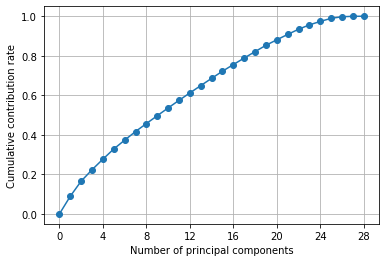

In [111]:
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

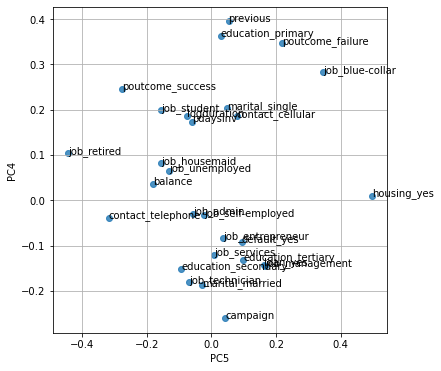

In [116]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
n1 = 5
n2 = 4
for x, y, name in zip(pca.components_[n1-1], pca.components_[n2-1], df.columns[1:]):
    if name.startswith('') or name.startswith('education'):
        plt.text(x, y, name)
plt.scatter(pca.components_[n1-1], pca.components_[n2-1], alpha=0.8)
plt.grid()
plt.xlabel('PC{}'.format(n1))
plt.ylabel('PC{}'.format(n2))
plt.show()

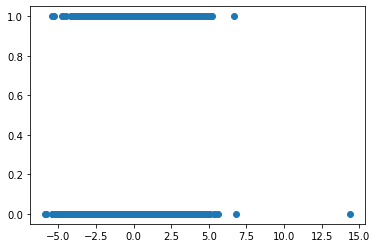

In [19]:
plt.scatter(feature.PC4, train.y)